1. Over view. so i scaped this data on houses form property management site, i'm attempting to clean to discover trends in housing for abuja properties, the data contains a total of 6866 rows of housing data lets dig and and see what interesting insights i can find.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

import  warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format= '{:.4f}'.format

In [2]:
df=pd.read_csv('C:/Users/ishar/Documents/datascience/Abuja_houses.csv')

In [3]:
pd.set_option('display.float_format','{:.2f}'.format)

In [4]:
df

,"2,500,000,000","Maitama District, Abuja",Property Ref: 2173814,Added On: 22 Mar 2024,Last Updated: 23 Apr 2024,Market Status: Available,Type: Detached Duplex,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 10,"Total Area: 1,700 sqm","Covered Area: 1,700 sqm",Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,"63,246,500","After Mountain Of Fire Estate, Before Shalom E...",Property Ref: 2260849,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex,Bedrooms: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"65,000,000","By American International School, Durumi, Abuja",Property Ref: 2260848,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Block of Flats,Bedrooms: 2,Bathrooms: 2,Toilets: 3,Parking Spaces: 3,NaN,NaN,NaN,NaN,NaN,NaN
2,"480,000,000","Wuye, Abuja",Property Ref: 2260802,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex,Bedrooms: 5,Toilets: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"140,000,000","Karsana Gwarimpa Extension In An Estate, Gwari...",Property Ref: 2260786,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex,Bedrooms: 4,Bathrooms: 4,Toilets: 5,Parking Spaces: 3,Total Area: 600 sqm,NaN,NaN,NaN,NaN,NaN
4,"63,500,000","Lugbe District, Abuja",Property Ref: 2260743,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: House,Bedrooms: 5,Bathrooms: 6,Toilets: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,"400,000,000","Guzape District, Abuja",Property Ref: 1420010,Added On: 13 Aug 2022,Last Updated: 09 May 2024,Market Status: Available,Type: Terraced Duplex,Bedrooms: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6862,"300,000,000","Guzape District, Abuja",Property Ref: 1416671,Added On: 10 Aug 2022,Last Updated: 04 Apr 2024,Market Status: Available,Type: Semi-detached Duplex,Bedrooms: 6,Bathrooms: 6,Toilets: 7,Parking Spaces: 5,NaN,NaN,NaN,NaN,NaN,NaN
6863,"95,000,000","Dakibiyu, Abuja",Property Ref: 1358938,Added On: 18 Jun 2022,Last Updated: 22 Feb 2024,Market Status: Available,Type: Semi-detached Duplex,Bedrooms: 4,Bathrooms: 4,Toilets: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6864,"420,000,000","Katampe Extension, Katampe, Abuja",Property Ref: 1413836,Added On: 08 Aug 2022,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex,Bedrooms: 6,Bathrooms: 6,Toilets: 7,Parking Spaces: 7,Total Area: 800 sqm,Covered Area: 600 sqm,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   2,500,000,000              6866 non-null   object 
 1   Maitama District, Abuja    6866 non-null   object 
 2   Property Ref: 2173814      6866 non-null   object 
 3   Added On: 22 Mar 2024      6866 non-null   object 
 4   Last Updated: 23 Apr 2024  6866 non-null   object 
 5   Market Status: Available   6866 non-null   object 
 6   Type: Detached Duplex      6866 non-null   object 
 7   Bedrooms: 7                6844 non-null   object 
 8   Bathrooms: 8               6212 non-null   object 
 9   Toilets: 8                 5834 non-null   object 
 10  Parking Spaces: 10         4413 non-null   object 
 11  Total Area: 1,700 sqm      2487 non-null   object 
 12  Covered Area: 1,700 sqm    1651 non-null   object 
 13  Unnamed: 13                301 non-null    objec

Data seems to be in a very confusing format as the columns are not named yet. appears we'd have some inspection and cleaning to do...

In [6]:
for cols in df.columns:
   display(df[cols].value_counts())

2,500,000,000
250,000,000       343
150,000,000       304
350,000,000       275
200,000,000       232
400,000,000       192
                 ... 
25,500,000          1
20,000,000,000      1
107,000,000         1
5,000,000,000       1
31,000,000          1
Name: count, Length: 326, dtype: int64

Maitama District, Abuja
Guzape District, Abuja                        571
Maitama District, Abuja                       396
Life Camp, Abuja                              331
Katampe Extension, Katampe, Abuja             305
Jahi, Abuja                                   273
                                             ... 
Behind Road Safety, Mabushi, Abuja              1
Hall 7 Estate, Karsana, Abuja                   1
By Cedar Crest, Apo, Abuja                      1
Extension, Kubwa, Abuja                         1
By Turkish Hospital, Idu Industrial, Abuja      1
Name: count, Length: 1674, dtype: int64

Property Ref: 2173814
Property Ref: 2198175    21
Property Ref: 2222041    19
Property Ref: 2068017    18
Property Ref: 2008335    17
Property Ref: 2140814    17
                         ..
Property Ref: 2027913     1
Property Ref: 1980882     1
Property Ref: 2030039     1
Property Ref: 2030058     1
Property Ref: 1407515     1
Name: count, Length: 6479, dtype: int64

Added On: 22 Mar 2024
Added On: 14 May 2024    98
Added On: 13 May 2024    91
Added On: 16 May 2024    90
Added On: 02 May 2024    78
Added On: 24 Apr 2024    75
                         ..
Added On: 05 Feb 2023     1
Added On: 04 Feb 2023     1
Added On: 27 Jul 2022     1
Added On: 19 Jun 2023     1
Added On: 08 Aug 2022     1
Name: count, Length: 635, dtype: int64

Last Updated: 23 Apr 2024
Last Updated: 17 May 2024    572
Last Updated: 15 May 2024    434
Last Updated: 23 Apr 2024    428
Last Updated: 16 May 2024    411
Last Updated: 13 May 2024    353
                            ... 
Last Updated: 25 Feb 2024     10
Last Updated: 01 Mar 2024      9
Last Updated: 05 Mar 2024      7
Last Updated: 17 Feb 2024      5
Last Updated: 15 Feb 2024      2
Name: count, Length: 92, dtype: int64

Market Status: Available
Market Status: Available    6863
Market Status: Sold            3
Name: count, dtype: int64

Type: Detached Duplex
Type: Detached Duplex           2824
Type: Terraced Duplex           2069
Type: Semi-detached Duplex       834
Type: Block of Flats             443
Type: House                      350
Type: Detached Bungalow          276
Type: Semi-detached Bungalow      61
Type: Terraced Bungalow            9
Name: count, dtype: int64

Bedrooms: 7
Bedrooms: 4                2746
Bedrooms: 5                1799
Bedrooms: 3                 743
Bedrooms: 6                 677
Bedrooms: 7                 314
Bedrooms: 2                 204
Bedrooms: 8                 147
Bedrooms: 9                  70
Bedrooms: 1                  34
Bedrooms: 12                 21
Bedrooms: 10                 19
Bedrooms: 11                  8
Bedrooms: 16                  7
Bedrooms: 20                  4
Bedrooms: 14                  3
Bedrooms: 50                  3
Bedrooms: 13                  2
Bedrooms: 40                  2
Bedrooms: 18                  2
Bedrooms: 17                  2
Bathrooms: 2                  2
Bedrooms: 32                  2
Bedrooms: 26                  2
Total Area: 1,723 sqm         1
Bedrooms: 21                  1
Bedrooms: 60                  1
Bathrooms: 6                  1
Bedrooms: 25                  1
Bedrooms: 56                  1
Total Area: 1,652 sqm         1
Bedrooms: 42                

Bathrooms: 8
Bathrooms: 4             1811
Bathrooms: 5             1678
Bathrooms: 6              885
Bathrooms: 3              465
Bathrooms: 7              359
                         ... 
Parking Spaces: 10          1
Toilets: 24                 1
Toilets: 18                 1
Total Area: 580 sqm         1
Covered Area: 624 sqm       1
Name: count, Length: 86, dtype: int64

Toilets: 8
Toilets: 5               2193
Toilets: 6               1488
Toilets: 4                680
Toilets: 7                564
Toilets: 8                280
                         ... 
Toilets: 70                 1
Total Area: 800 sqm         1
Total Area: 1,700 sqm       1
Toilets: 15                 1
Toilets: 60                 1
Name: count, Length: 87, dtype: int64

Parking Spaces: 10
Parking Spaces: 4      821
Parking Spaces: 3      811
Parking Spaces: 5      630
Parking Spaces: 6      395
Parking Spaces: 10     346
                      ... 
Total Area: 180 sqm      1
Parking Spaces: 800      1
Total Area: 160 sqm      1
Total Area: 568 sqm      1
Parking Spaces: 35       1
Name: count, Length: 123, dtype: int64

Total Area: 1,700 sqm
Furnishing: Furnished    349
Servicing: Serviced      176
Total Area: 600 sqm      168
Total Area: 500 sqm      138
Total Area: 2,000 sqm    112
                        ... 
Covered Area: 340 sqm      1
Total Area: 80 sqm         1
Total Area: 2,260 sqm      1
Total Area: 2,090 sqm      1
Total Area: 670 sqm        1
Name: count, Length: 185, dtype: int64

Covered Area: 1,700 sqm
Covered Area: 500 sqm    112
Covered Area: 600 sqm    104
Servicing: Serviced       99
Covered Area: 400 sqm     95
Covered Area: 300 sqm     81
                        ... 
Total Area: 23 sqm         1
Covered Area: 2 sqm        1
Total Area: 360 sqm        1
Covered Area: 485 sqm      1
Covered Area: 580 sqm      1
Name: count, Length: 154, dtype: int64

Unnamed: 13
Servicing: Serviced         50
Covered Area: 700 sqm       22
Covered Area: 320 sqm       22
Covered Area: 280 sqm       19
Covered Area: 300 sqm       16
                            ..
Covered Area: 24,000 sqm     1
Covered Area: 3,600 sqm      1
Covered Area: 6,000 sqm      1
Covered Area: 520 sqm        1
Covered Area: 1,832 sqm      1
Name: count, Length: 63, dtype: int64

Unnamed: 14
Servicing: Serviced                     11
Service Charge: ₦300 per day             1
Service Charge: ₦500,000                 1
Service Charge: ₦300,000 per annum       1
Service Charge: ₦1,500,000 per annum     1
Service Charge: ₦130,000,000             1
Service Charge: ₦150,000 per annum       1
Service Charge: ₦300 per annum           1
Service Charge: ₦200,000 per annum       1
Service Charge: ₦100,000                 1
Name: count, dtype: int64

Unnamed: 15
Service Charge: ₦150,000 per annum    1
Service Charge: ₦200,000 per annum    1
Service Charge: ₦250,000 per annum    1
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

the columns 0 through 6 appear to be consistent with thier values but from seven down there seem to be so much anomalies, so i would attempt to split the dataframe into 2 one side with the consistent data and the other with the inconsistent data.

In [7]:
df.columns

Index(['2,500,000,000', 'Maitama District, Abuja', 'Property Ref: 2173814',
       'Added On: 22 Mar 2024', 'Last Updated: 23 Apr 2024',
       'Market Status: Available', 'Type: Detached Duplex', 'Bedrooms: 7',
       'Bathrooms: 8', 'Toilets: 8', 'Parking Spaces: 10',
       'Total Area: 1,700 sqm', 'Covered Area: 1,700 sqm', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [8]:
df_anomaly=df[['Bedrooms: 7',
       'Bathrooms: 8', 'Toilets: 8', 'Parking Spaces: 10',
       'Total Area: 1,700 sqm', 'Covered Area: 1,700 sqm', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']].copy()

In [9]:
df.drop(df_anomaly,axis=1,inplace=True)

In [10]:
df

,"2,500,000,000","Maitama District, Abuja",Property Ref: 2173814,Added On: 22 Mar 2024,Last Updated: 23 Apr 2024,Market Status: Available,Type: Detached Duplex
0,"63,246,500","After Mountain Of Fire Estate, Before Shalom E...",Property Ref: 2260849,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex
1,"65,000,000","By American International School, Durumi, Abuja",Property Ref: 2260848,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Block of Flats
2,"480,000,000","Wuye, Abuja",Property Ref: 2260802,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex
3,"140,000,000","Karsana Gwarimpa Extension In An Estate, Gwari...",Property Ref: 2260786,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex
4,"63,500,000","Lugbe District, Abuja",Property Ref: 2260743,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: House
...,...,...,...,...,...,...,...
6861,"400,000,000","Guzape District, Abuja",Property Ref: 1420010,Added On: 13 Aug 2022,Last Updated: 09 May 2024,Market Status: Available,Type: Terraced Duplex
6862,"300,000,000","Guzape District, Abuja",Property Ref: 1416671,Added On: 10 Aug 2022,Last Updated: 04 Apr 2024,Market Status: Available,Type: Semi-detached Duplex
6863,"95,000,000","Dakibiyu, Abuja",Property Ref: 1358938,Added On: 18 Jun 2022,Last Updated: 22 Feb 2024,Market Status: Available,Type: Semi-detached Duplex
6864,"420,000,000","Katampe Extension, Katampe, Abuja",Property Ref: 1413836,Added On: 08 Aug 2022,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex


In [11]:
cols=['Price',"Location","Property Ref","Date Added","Last Updated","market Status","Type"]
df.columns=cols

In [12]:
df.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type
0,"63,246,500","After Mountain Of Fire Estate, Before Shalom E...",Property Ref: 2260849,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex
1,"65,000,000","By American International School, Durumi, Abuja",Property Ref: 2260848,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Block of Flats
2,"480,000,000","Wuye, Abuja",Property Ref: 2260802,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex
3,"140,000,000","Karsana Gwarimpa Extension In An Estate, Gwari...",Property Ref: 2260786,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: Detached Duplex
4,"63,500,000","Lugbe District, Abuja",Property Ref: 2260743,Added On: 17 May 2024,Last Updated: 17 May 2024,Market Status: Available,Type: House


In [13]:
df['Price']= df['Price'].str.replace(",","")
df['Price']=df['Price'].astype('int64')

In [14]:
df['Location'].value_counts()
df['Location'].nunique()

1674

In [15]:
df.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type'],
      dtype='object')

In [16]:
df['Property Ref']= df['Property Ref'].str.replace('Property Ref:',"")
df['Date Added']= df['Date Added'].str.replace('Added On:',"")
df['Last Updated']= df['Last Updated'].str.replace('Last Updated:',"")
df['market Status']= df['market Status'].str.replace('Market Status:',"")
df['Last Updated']= df['Last Updated'].str.replace('Last Updated:',"")
df['Type']= df['Type'].str.replace('Type:',"")

In [17]:
df

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type
0,63246500,"After Mountain Of Fire Estate, Before Shalom E...",2260849,17 May 2024,17 May 2024,Available,Detached Duplex
1,65000000,"By American International School, Durumi, Abuja",2260848,17 May 2024,17 May 2024,Available,Block of Flats
2,480000000,"Wuye, Abuja",2260802,17 May 2024,17 May 2024,Available,Detached Duplex
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,17 May 2024,17 May 2024,Available,Detached Duplex
4,63500000,"Lugbe District, Abuja",2260743,17 May 2024,17 May 2024,Available,House
...,...,...,...,...,...,...,...
6861,400000000,"Guzape District, Abuja",1420010,13 Aug 2022,09 May 2024,Available,Terraced Duplex
6862,300000000,"Guzape District, Abuja",1416671,10 Aug 2022,04 Apr 2024,Available,Semi-detached Duplex
6863,95000000,"Dakibiyu, Abuja",1358938,18 Jun 2022,22 Feb 2024,Available,Semi-detached Duplex
6864,420000000,"Katampe Extension, Katampe, Abuja",1413836,08 Aug 2022,17 May 2024,Available,Detached Duplex


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          6866 non-null   int64 
 1   Location       6866 non-null   object
 2   Property Ref   6866 non-null   object
 3   Date Added     6866 non-null   object
 4   Last Updated   6866 non-null   object
 5   market Status  6866 non-null   object
 6   Type           6866 non-null   object
dtypes: int64(1), object(6)
memory usage: 375.6+ KB


In [19]:
df['Date Added'].value_counts()

Date Added
14 May 2024    98
13 May 2024    91
16 May 2024    90
02 May 2024    78
24 Apr 2024    75
               ..
05 Feb 2023     1
04 Feb 2023     1
27 Jul 2022     1
19 Jun 2023     1
08 Aug 2022     1
Name: count, Length: 635, dtype: int64

In [20]:
df['Last Updated'].value_counts()

Last Updated
17 May 2024    572
15 May 2024    434
23 Apr 2024    428
16 May 2024    411
13 May 2024    353
              ... 
25 Feb 2024     10
01 Mar 2024      9
05 Mar 2024      7
17 Feb 2024      5
15 Feb 2024      2
Name: count, Length: 92, dtype: int64

In [21]:
df['Date Added']=pd.to_datetime(df['Date Added'],format='mixed')
df['Last Updated']=pd.to_datetime(df['Last Updated'],format='mixed')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Price          6866 non-null   int64         
 1   Location       6866 non-null   object        
 2   Property Ref   6866 non-null   object        
 3   Date Added     6866 non-null   datetime64[ns]
 4   Last Updated   6866 non-null   datetime64[ns]
 5   market Status  6866 non-null   object        
 6   Type           6866 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 375.6+ KB


In [23]:
df.describe()

,Price,Date Added,Last Updated
count,6866.00,6866,6866
mean,1520756211.48,2023-12-25 07:24:24.957762816,2024-04-25 00:09:01.101077760
min,250000.00,2022-05-18 00:00:00,2024-02-15 00:00:00
25%,120000000.00,2023-11-06 00:00:00,2024-04-15 00:00:00
50%,230000000.00,2024-02-21 00:00:00,2024-05-03 00:00:00
75%,450000000.00,2024-04-12 18:00:00,2024-05-13 00:00:00
max,3500000000000.00,2024-05-17 00:00:00,2024-05-17 00:00:00
std,47355084849.10,NaN,NaN


In [24]:
df.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type
0,63246500,"After Mountain Of Fire Estate, Before Shalom E...",2260849,2024-05-17,2024-05-17,Available,Detached Duplex
1,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats
2,480000000,"Wuye, Abuja",2260802,2024-05-17,2024-05-17,Available,Detached Duplex
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex
4,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House


In [25]:
bins = [0, 1e6, 1e9, 1e12, float('inf')]  # Bins for millions, billions, trillions, and above
labels = ['Million<', 'Millions', 'Billions', 'Trillions']

df['Price_cat']=pd.cut(df['Price'],bins=bins,labels=labels,right=True)

In [26]:
df

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat
0,63246500,"After Mountain Of Fire Estate, Before Shalom E...",2260849,2024-05-17,2024-05-17,Available,Detached Duplex,Millions
1,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions
2,480000000,"Wuye, Abuja",2260802,2024-05-17,2024-05-17,Available,Detached Duplex,Millions
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions
4,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions
...,...,...,...,...,...,...,...,...
6861,400000000,"Guzape District, Abuja",1420010,2022-08-13,2024-05-09,Available,Terraced Duplex,Millions
6862,300000000,"Guzape District, Abuja",1416671,2022-08-10,2024-04-04,Available,Semi-detached Duplex,Millions
6863,95000000,"Dakibiyu, Abuja",1358938,2022-06-18,2024-02-22,Available,Semi-detached Duplex,Millions
6864,420000000,"Katampe Extension, Katampe, Abuja",1413836,2022-08-08,2024-05-17,Available,Detached Duplex,Millions


In [27]:
df['Price_cat'].value_counts()

Price_cat
Millions     6209
Billions      646
Million<        9
Trillions       2
Name: count, dtype: int64

In [28]:
df[df['Price_cat']=='Million<']

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat
1623,1000000,"Maitama District, Abuja",2183448,2024-03-28,2024-05-12,Available,Detached Duplex,Million<
2242,1000000,"Katampe Extension, Katampe, Abuja",2057953,2024-01-02,2024-04-30,Available,Detached Duplex,Million<
4902,500000,"Wuse 2, Abuja",2204010,2024-04-13,2024-04-24,Available,Terraced Duplex,Million<
4996,1000000,"Maitama District, Abuja",2179433,2024-03-26,2024-04-29,Available,Detached Duplex,Million<
5269,500000,"Asokoro District, Abuja",2080990,2024-01-18,2024-05-13,Available,Block of Flats,Million<
6147,1000000,"Off Mallam Nasir El Rufai Way, Guzape District...",1860498,2023-08-11,2024-05-15,Available,Detached Duplex,Million<
6497,1000000,"Maitama District, Abuja",1715181,2023-04-29,2024-05-01,Available,Detached Duplex,Million<
6498,1000000,"Katampe Extension, Katampe, Abuja",1715172,2023-04-29,2024-04-20,Available,Detached Duplex,Million<
6695,250000,"Guzape District, Abuja",1598055,2023-01-19,2024-03-04,Available,Terraced Duplex,Million<


I successfully separated the data into two distinct datasets. Following this separation, I named the columns appropriately to enhance readability and facilitate further analysis. I also cleaned each column by removing any extra unnecessary data, ensuring that the data is clear and well-structured.

Additionally, I added a new column to categorize and highlight the differences in prices, which will aid in subsequent analysis. I also converted some columns to their appropriate data types for more accurate analysis. This dataset is now prepared and ready to be merged with the other dataset once it has been similarly prepared.

In [29]:
df_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bedrooms: 7              6844 non-null   object 
 1   Bathrooms: 8             6212 non-null   object 
 2   Toilets: 8               5834 non-null   object 
 3   Parking Spaces: 10       4413 non-null   object 
 4   Total Area: 1,700 sqm    2487 non-null   object 
 5   Covered Area: 1,700 sqm  1651 non-null   object 
 6   Unnamed: 13              301 non-null    object 
 7   Unnamed: 14              20 non-null     object 
 8   Unnamed: 15              3 non-null      object 
 9   Unnamed: 16              0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 536.5+ KB


Most of the data columns appear to be in object format with the unnamed 16 alone in float, this column appears to be empty and filled with nan values. most of the  columns in df anomaly also have missing rows so id observe each one closely to see if i have extra issues or it's just issues with the missing rows.

In [30]:
df_anomaly['Unnamed: 16'].unique()

array([nan])

In [31]:
df_anomaly['Unnamed: 15'].unique()

array([nan, 'Service Charge: ₦150,000 per annum',
       'Service Charge: ₦200,000 per annum',
       'Service Charge: ₦250,000 per annum'], dtype=object)

In [32]:
df_anomaly['Covered Area: 1,700 sqm'].unique()

array([nan, 'Total Area: 600 sqm', 'Covered Area: 350 sqm',
       'Covered Area: 450 sqm', 'Covered Area: 60 sqm',
       'Covered Area: 1,500 sqm', 'Covered Area: 220 sqm',
       'Covered Area: 250 sqm', 'Covered Area: 1,400 sqm',
       'Covered Area: 480 sqm', 'Covered Area: 300 sqm',
       'Covered Area: 500 sqm', 'Total Area: 700 sqm',
       'Covered Area: 750 sqm', 'Total Area: 2,300 sqm',
       'Covered Area: 1,200 sqm', 'Covered Area: 400 sqm',
       'Covered Area: 550 sqm', 'Total Area: 1,100 sqm',
       'Total Area: 250 sqm', 'Service Charge: ₦500,000',
       'Covered Area: 200 sqm', 'Servicing: Serviced',
       'Covered Area: 800 sqm', 'Covered Area: 2,300 sqm',
       'Covered Area: 650 sqm', 'Total Area: 1,200 sqm',
       'Covered Area: 700 sqm', 'Covered Area: 3,200 sqm',
       'Total Area: 450 sqm', 'Covered Area: 80 sqm',
       'Covered Area: 1,000 sqm', 'Covered Area: 600 sqm',
       'Covered Area: 1,800 sqm', 'Covered Area: 2,000 sqm',
       'Covered Are

Upon further inspection i noticed most of the columns have data that should be in other columns in them so i would have to create a custom function to move those rows of data forward. 

In [33]:
def move_data(df,source,target,condition_col,pattern):
    """This function aims to move data that are not in the right columns to thier approiprate columns

    Args:
        df (data frame): the entire data frame with the columns you want to work on
        source (variable): the coulumn & row that has the data you want to move
        target (Variable): the column you want to move the data to
        condition_col (variable): the column that meets the condition of the pattern 
        pattern (variable): the pattern we're looking for

    Returns:
        the data frame with the column data arranged approiprately
    """
    for index,row in df.iterrows():
        if pd.isnull(row[target]) and pd.notnull(row[source]) and pattern in row[condition_col]:
            df.at[index,target] = row[source]
            df.at[index,source] = None
    return df

In [34]:
df_anomaly['Unnamed: 16']=df_anomaly['Unnamed: 16'].astype('object')

In [35]:
df_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bedrooms: 7              6844 non-null   object
 1   Bathrooms: 8             6212 non-null   object
 2   Toilets: 8               5834 non-null   object
 3   Parking Spaces: 10       4413 non-null   object
 4   Total Area: 1,700 sqm    2487 non-null   object
 5   Covered Area: 1,700 sqm  1651 non-null   object
 6   Unnamed: 13              301 non-null    object
 7   Unnamed: 14              20 non-null     object
 8   Unnamed: 15              3 non-null      object
 9   Unnamed: 16              0 non-null      object
dtypes: object(10)
memory usage: 536.5+ KB


In [36]:
a='Bedrooms: 7'
b='Bathrooms: 8'
c='Toilets: 8'
d='Parking Spaces: 10'
e='Total Area: 1,700 sqm'
f='Covered Area: 1,700 sqm'
g='Unnamed: 13'
h='Unnamed: 14'
i='Unnamed: 15'
j='Unnamed: 16'

Servicing:
Service Charge:


In [37]:
df_anomaly[df_anomaly[f]=='Service Charge: ₦4,000,000 per annum']

,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 10,"Total Area: 1,700 sqm","Covered Area: 1,700 sqm",Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
6708,Bedrooms: 4,Bathrooms: 4,Toilets: 5,"Total Area: 3,000 sqm",Servicing: Serviced,"Service Charge: ₦4,000,000 per annum",NaN,NaN,NaN,NaN


In [38]:
z='Service Charge:'
df_anomaly = move_data(df_anomaly, source=a, target=j, condition_col=a, pattern=z)
df_anomaly = move_data(df_anomaly, source=b, target=j, condition_col=b, pattern=z)
df_anomaly = move_data(df_anomaly, source=c, target=j, condition_col=c, pattern=z)
df_anomaly = move_data(df_anomaly, source=d, target=j, condition_col=d, pattern=z)
df_anomaly = move_data(df_anomaly, source=f, target=j, condition_col=f, pattern=z)
df_anomaly = move_data(df_anomaly, source=e, target=j, condition_col=e, pattern=z)
df_anomaly = move_data(df_anomaly, source=g, target=j, condition_col=g, pattern=z)
df_anomaly = move_data(df_anomaly, source=h, target=j, condition_col=h, pattern=z)
df_anomaly = move_data(df_anomaly, source=i, target=j, condition_col=i, pattern=z)

In [39]:
print(df_anomaly['Unnamed: 16'].notnull().sum(),df_anomaly['Unnamed: 16'].unique())

29 [nan 'Service Charge: ₦150,000 per annum' 'Service Charge: ₦500,000'
 'Service Charge: ₦300,000 per annum' 'Service Charge: ₦200,000 per annum'
 'Service Charge: ₦135,000 per annum' 'Service Charge: ₦500,000 per annum'
 'Service Charge: ₦120,000 per annum' 'Service Charge: ₦300 per day'
 'Service Charge: ₦1,500,000 per annum' 'Service Charge: ₦130,000,000'
 'Service Charge: ₦1,643,500 per annum'
 'Service Charge: ₦450,000 per annum' 'Service Charge: ₦300 per annum'
 'Service Charge: ₦201,000 per annum' 'Service Charge: ₦250,000 per annum'
 'Service Charge: ₦4,000,000 per annum' 'Service Charge: ₦100,000']


In [40]:
z='Servicing:'
df_anomaly = move_data(df_anomaly, source=a, target=i, condition_col=a, pattern=z)
df_anomaly = move_data(df_anomaly, source=b, target=i, condition_col=b, pattern=z)
df_anomaly = move_data(df_anomaly, source=c, target=i, condition_col=c, pattern=z)
df_anomaly = move_data(df_anomaly, source=d, target=i, condition_col=d, pattern=z)
df_anomaly = move_data(df_anomaly, source=f, target=i, condition_col=f, pattern=z)
df_anomaly = move_data(df_anomaly, source=e, target=i, condition_col=e, pattern=z)
df_anomaly = move_data(df_anomaly, source=g, target=i, condition_col=g, pattern=z)
df_anomaly = move_data(df_anomaly, source=h, target=i, condition_col=h, pattern=z)
df_anomaly = move_data(df_anomaly, source=j, target=i, condition_col=j, pattern=z)

In [41]:
df_anomaly['Unnamed: 15'].notnull().sum()

403

In [42]:
df_anomaly[df_anomaly[b]=='Furnishing: Furnished']

,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 10,"Total Area: 1,700 sqm","Covered Area: 1,700 sqm",Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
191,Bedrooms: 7,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Bedrooms: 4,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,Bedrooms: 6,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Bedrooms: 4,Furnishing: Furnished,Total Area: 500 sqm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,Bedrooms: 5,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,Bedrooms: 4,Furnishing: Furnished,"Total Area: 1,800 sqm",NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,Bedrooms: 4,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,Bedrooms: 4,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258,Bedrooms: 4,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1266,Bedrooms: 4,Furnishing: Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
z='Furnishing:'
df_anomaly = move_data(df_anomaly, source=a, target=h, condition_col=a, pattern=z)
df_anomaly = move_data(df_anomaly, source=b, target=h, condition_col=b, pattern=z)
df_anomaly = move_data(df_anomaly, source=c, target=h, condition_col=c, pattern=z)
df_anomaly = move_data(df_anomaly, source=d, target=h, condition_col=d, pattern=z)
df_anomaly = move_data(df_anomaly, source=f, target=h, condition_col=f, pattern=z)
df_anomaly = move_data(df_anomaly, source=e, target=h, condition_col=e, pattern=z)
df_anomaly = move_data(df_anomaly, source=g, target=h, condition_col=g, pattern=z)
df_anomaly = move_data(df_anomaly, source=i, target=h, condition_col=i, pattern=z)
df_anomaly = move_data(df_anomaly, source=j, target=h, condition_col=j, pattern=z)

In [44]:
df_anomaly[df_anomaly[h]=='Furnishing: Furnished']

,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 10,"Total Area: 1,700 sqm","Covered Area: 1,700 sqm",Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
10,Bedrooms: 6,Bathrooms: 8,Toilets: 8,Parking Spaces: 5,None,Total Area: 600 sqm,Covered Area: 450 sqm,Furnishing: Furnished,Servicing: Serviced,"Service Charge: ₦150,000 per annum"
30,Bedrooms: 2,Bathrooms: 3,Toilets: 3,None,None,NaN,NaN,Furnishing: Furnished,Servicing: Serviced,NaN
85,Bedrooms: 4,Bathrooms: 4,Toilets: 5,None,NaN,NaN,NaN,Furnishing: Furnished,NaN,NaN
86,Bedrooms: 2,Bathrooms: 2,Toilets: 2,Parking Spaces: 2,None,NaN,NaN,Furnishing: Furnished,NaN,NaN
124,Bedrooms: 4,Bathrooms: 4,Toilets: 5,Parking Spaces: 4,None,NaN,NaN,Furnishing: Furnished,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6676,Bedrooms: 5,Bathrooms: 7,Toilets: 6,Parking Spaces: 4,None,Total Area: 800 sqm,None,Furnishing: Furnished,Servicing: Serviced,NaN
6711,Bedrooms: 4,Toilets: 4,Parking Spaces: 3,None,None,NaN,NaN,Furnishing: Furnished,Servicing: Serviced,NaN
6811,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 12,None,"Total Area: 1,500 sqm","Covered Area: 1,200 sqm",Furnishing: Furnished,Servicing: Serviced,NaN
6831,Bedrooms: 4,Bathrooms: 5,Toilets: 5,Parking Spaces: 4,None,Total Area: 500 sqm,Covered Area: 500 sqm,Furnishing: Furnished,Servicing: Serviced,NaN


In [45]:
df_anomaly.columns

Index(['Bedrooms: 7', 'Bathrooms: 8', 'Toilets: 8', 'Parking Spaces: 10',
       'Total Area: 1,700 sqm', 'Covered Area: 1,700 sqm', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [46]:

df_anomaly = move_data(df_anomaly, source=a, target=f, condition_col=a, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=b, target=f, condition_col=b, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=c, target=f, condition_col=c, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=d, target=f, condition_col=d, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=e, target=f, condition_col=e, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=g, target=f, condition_col=g, pattern='Covered Area')
df_anomaly  = move_data(df_anomaly, source=h, target=f, condition_col=h, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=i, target=f, condition_col=i, pattern='Covered Area')
df_anomaly = move_data(df_anomaly, source=j, target=f, condition_col=j, pattern='Covered Area')

In [47]:
df_anomaly[df_anomaly[h]=='Furnishing: Furnished']

,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 10,"Total Area: 1,700 sqm","Covered Area: 1,700 sqm",Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
10,Bedrooms: 6,Bathrooms: 8,Toilets: 8,Parking Spaces: 5,None,Total Area: 600 sqm,Covered Area: 450 sqm,Furnishing: Furnished,Servicing: Serviced,"Service Charge: ₦150,000 per annum"
30,Bedrooms: 2,Bathrooms: 3,Toilets: 3,None,None,NaN,NaN,Furnishing: Furnished,Servicing: Serviced,NaN
85,Bedrooms: 4,Bathrooms: 4,Toilets: 5,None,NaN,NaN,NaN,Furnishing: Furnished,NaN,NaN
86,Bedrooms: 2,Bathrooms: 2,Toilets: 2,Parking Spaces: 2,None,NaN,NaN,Furnishing: Furnished,NaN,NaN
124,Bedrooms: 4,Bathrooms: 4,Toilets: 5,Parking Spaces: 4,None,NaN,NaN,Furnishing: Furnished,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6676,Bedrooms: 5,Bathrooms: 7,Toilets: 6,Parking Spaces: 4,None,Total Area: 800 sqm,None,Furnishing: Furnished,Servicing: Serviced,NaN
6711,Bedrooms: 4,Toilets: 4,Parking Spaces: 3,None,None,NaN,NaN,Furnishing: Furnished,Servicing: Serviced,NaN
6811,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 12,None,"Total Area: 1,500 sqm","Covered Area: 1,200 sqm",Furnishing: Furnished,Servicing: Serviced,NaN
6831,Bedrooms: 4,Bathrooms: 5,Toilets: 5,Parking Spaces: 4,None,Total Area: 500 sqm,Covered Area: 500 sqm,Furnishing: Furnished,Servicing: Serviced,NaN


In [48]:
z='Total Area'
df_anomaly = move_data(df_anomaly, source=a, target=e, condition_col=a, pattern=z)
df_anomaly = move_data(df_anomaly, source=b, target=e, condition_col=b, pattern=z)
df_anomaly = move_data(df_anomaly, source=c, target=e, condition_col=c, pattern=z)
df_anomaly = move_data(df_anomaly, source=d, target=e, condition_col=d, pattern=z)
df_anomaly = move_data(df_anomaly, source=f, target=e, condition_col=f, pattern=z)
df_anomaly = move_data(df_anomaly, source=g, target=e, condition_col=g, pattern=z)
df_anomaly = move_data(df_anomaly, source=h, target=e, condition_col=h, pattern=z)
df_anomaly = move_data(df_anomaly, source=i, target=e, condition_col=i, pattern=z)
df_anomaly = move_data(df_anomaly, source=j, target=e, condition_col=j, pattern=z)

In [49]:
df_anomaly[df_anomaly[h]=='Furnishing: Furnished']

,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 10,"Total Area: 1,700 sqm","Covered Area: 1,700 sqm",Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
10,Bedrooms: 6,Bathrooms: 8,Toilets: 8,Parking Spaces: 5,Total Area: 600 sqm,None,Covered Area: 450 sqm,Furnishing: Furnished,Servicing: Serviced,"Service Charge: ₦150,000 per annum"
30,Bedrooms: 2,Bathrooms: 3,Toilets: 3,None,None,NaN,NaN,Furnishing: Furnished,Servicing: Serviced,NaN
85,Bedrooms: 4,Bathrooms: 4,Toilets: 5,None,NaN,NaN,NaN,Furnishing: Furnished,NaN,NaN
86,Bedrooms: 2,Bathrooms: 2,Toilets: 2,Parking Spaces: 2,None,NaN,NaN,Furnishing: Furnished,NaN,NaN
124,Bedrooms: 4,Bathrooms: 4,Toilets: 5,Parking Spaces: 4,None,NaN,NaN,Furnishing: Furnished,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6676,Bedrooms: 5,Bathrooms: 7,Toilets: 6,Parking Spaces: 4,Total Area: 800 sqm,None,None,Furnishing: Furnished,Servicing: Serviced,NaN
6711,Bedrooms: 4,Toilets: 4,Parking Spaces: 3,None,None,NaN,NaN,Furnishing: Furnished,Servicing: Serviced,NaN
6811,Bedrooms: 7,Bathrooms: 8,Toilets: 8,Parking Spaces: 12,"Total Area: 1,500 sqm",None,"Covered Area: 1,200 sqm",Furnishing: Furnished,Servicing: Serviced,NaN
6831,Bedrooms: 4,Bathrooms: 5,Toilets: 5,Parking Spaces: 4,Total Area: 500 sqm,None,Covered Area: 500 sqm,Furnishing: Furnished,Servicing: Serviced,NaN


In [50]:
z='Parking Spaces'
df_anomaly = move_data(df_anomaly, source=a, target=d, condition_col=a, pattern=z)
df_anomaly = move_data(df_anomaly, source=b, target=d, condition_col=b, pattern=z)
df_anomaly = move_data(df_anomaly, source=c, target=d, condition_col=c, pattern=z)
df_anomaly = move_data(df_anomaly, source=e, target=d, condition_col=e, pattern=z)
df_anomaly = move_data(df_anomaly, source=f, target=d, condition_col=f, pattern=z)
df_anomaly = move_data(df_anomaly, source=g, target=d, condition_col=g, pattern=z)
df_anomaly = move_data(df_anomaly, source=h, target=d, condition_col=h, pattern=z)
df_anomaly = move_data(df_anomaly, source=i, target=d, condition_col=i, pattern=z)
df_anomaly = move_data(df_anomaly, source=j, target=d, condition_col=j, pattern=z)

In [51]:
df_anomaly[d].unique()

array([nan, 'Parking Spaces: 3', 'Parking Spaces: 2', 'Parking Spaces: 6',
       'Parking Spaces: 5', 'Parking Spaces: 7', 'Parking Spaces: 4',
       'Parking Spaces: 8', 'Parking Spaces: 20', None,
       'Parking Spaces: 10', 'Parking Spaces: 15', 'Parking Spaces: 1',
       'Parking Spaces: 50', 'Parking Spaces: 12', 'Parking Spaces: 9',
       'Parking Spaces: 14', 'Parking Spaces: 25', 'Parking Spaces: 18',
       'Parking Spaces: 100', 'Parking Spaces: 28', 'Parking Spaces: 16',
       'Parking Spaces: 30', 'Parking Spaces: 13', 'Parking Spaces: 24',
       'Parking Spaces: 1200', 'Parking Spaces: 700',
       'Parking Spaces: 200', 'Parking Spaces: 11', 'Parking Spaces: 800',
       'Parking Spaces: 36', 'Parking Spaces: 3000',
       'Parking Spaces: 1000', 'Parking Spaces: 55', 'Parking Spaces: 40',
       'Parking Spaces: 58', 'Parking Spaces: 400', 'Parking Spaces: 500',
       'Parking Spaces: 10000', 'Parking Spaces: 600',
       'Parking Spaces: 23', 'Parking Spaces: 60

In [52]:
z='Toilets'
df_anomaly = move_data(df_anomaly, source=a, target=c, condition_col=a, pattern=z)
df_anomaly = move_data(df_anomaly, source=b, target=c, condition_col=b, pattern=z)
df_anomaly = move_data(df_anomaly, source=d, target=c, condition_col=d, pattern=z)
df_anomaly = move_data(df_anomaly, source=e, target=c, condition_col=e, pattern=z)
df_anomaly = move_data(df_anomaly  , source=f, target=c, condition_col=f, pattern=z)
df_anomaly = move_data(df_anomaly, source=g, target=c, condition_col=g, pattern=z)
df_anomaly = move_data(df_anomaly, source=h, target=c, condition_col=h, pattern=z)
df_anomaly = move_data(df_anomaly, source=i, target=c, condition_col=i, pattern=z)
df_anomaly = move_data(df_anomaly, source=j, target=c, condition_col=j, pattern=z)

In [53]:
df_anomaly[c].unique()

array([nan, 'Toilets: 3', 'Toilets: 6', 'Toilets: 5', 'Toilets: 4',
       'Toilets: 8', 'Toilets: 7', 'Toilets: 2', 'Toilets: 10',
       'Toilets: 1', 'Toilets: 9', 'Toilets: 37', 'Toilets: 40', None,
       'Toilets: 12', 'Toilets: 11', 'Toilets: 18', 'Toilets: 25',
       'Toilets: 22', 'Toilets: 24', 'Toilets: 21', 'Toilets: 72',
       'Toilets: 28', 'Toilets: 19', 'Toilets: 13', 'Toilets: 14',
       'Toilets: 63', 'Toilets: 17', 'Toilets: 30', 'Toilets: 56',
       'Toilets: 41', 'Toilets: 300', 'Toilets: 55', 'Toilets: 70',
       'Toilets: 16', 'Toilets: 15', 'Toilets: 20', 'Toilets: 50',
       'Toilets: 49', 'Toilets: 45', 'Toilets: 35', 'Toilets: 27',
       'Toilets: 57', 'Toilets: 65', 'Toilets: 34', 'Toilets: 46',
       'Toilets: 102', 'Toilets: 60'], dtype=object)

In [54]:
df_anomaly[b].unique()

array([nan, 'Bathrooms: 2', None, 'Bathrooms: 4', 'Bathrooms: 6',
       'Bathrooms: 5', 'Bathrooms: 8', 'Bathrooms: 3', 'Bathrooms: 10',
       'Bathrooms: 1', 'Bathrooms: 7', 'Bathrooms: 9', 'Bathrooms: 37',
       'Bathrooms: 12', 'Bathrooms: 30', 'Bathrooms: 18', 'Bathrooms: 22',
       'Bathrooms: 11', 'Bathrooms: 16', 'Bathrooms: 72', 'Bathrooms: 28',
       'Bathrooms: 19', 'Bathrooms: 14', 'Bathrooms: 64', 'Bathrooms: 13',
       'Bathrooms: 20', 'Bathrooms: 17', 'Bathrooms: 24', 'Bathrooms: 46',
       'Bathrooms: 48', 'Bathrooms: 40', 'Bathrooms: 287',
       'Bathrooms: 32', 'Bathrooms: 55', 'Bathrooms: 70', 'Bathrooms: 39',
       'Bathrooms: 23', 'Bathrooms: 60', 'Bathrooms: 25', 'Bathrooms: 26',
       'Bathrooms: 44', 'Bathrooms: 50', 'Bathrooms: 93'], dtype=object)

In [55]:
df_anomaly[a].unique()

array(['Bedrooms: 5', 'Bedrooms: 2', 'Bedrooms: 4', 'Bedrooms: 3',
       'Bedrooms: 6', 'Bedrooms: 9', 'Bedrooms: 1', 'Bedrooms: 8',
       'Bedrooms: 7', 'Bedrooms: 11', 'Bedrooms: 37', 'Bedrooms: 40',
       'Bedrooms: 10', None, nan, 'Bedrooms: 12', 'Bedrooms: 14',
       'Bathrooms: 18', 'Bedrooms: 16', 'Bedrooms: 54', 'Bedrooms: 28',
       'Bedrooms: 36', 'Bedrooms: 17', 'Bathrooms: 2', 'Bedrooms: 64',
       'Bedrooms: 13', 'Bedrooms: 20', 'Bedrooms: 15', 'Bedrooms: 46',
       'Bedrooms: 48', 'Bedrooms: 287', 'Bedrooms: 32', 'Bedrooms: 18',
       'Bedrooms: 38', 'Bedrooms: 39', 'Bedrooms: 33', 'Bedrooms: 21',
       'Bedrooms: 60', 'Bathrooms: 6', 'Bedrooms: 25', 'Bedrooms: 26',
       'Bedrooms: 44', 'Bedrooms: 50', 'Bedrooms: 23', 'Bedrooms: 24',
       'Bedrooms: 65', 'Bedrooms: 42', 'Bedrooms: 56'], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Price          6866 non-null   int64         
 1   Location       6866 non-null   object        
 2   Property Ref   6866 non-null   object        
 3   Date Added     6866 non-null   datetime64[ns]
 4   Last Updated   6866 non-null   datetime64[ns]
 5   market Status  6866 non-null   object        
 6   Type           6866 non-null   object        
 7   Price_cat      6866 non-null   category      
dtypes: category(1), datetime64[ns](2), int64(1), object(4)
memory usage: 382.5+ KB


In [57]:
df_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bedrooms: 7              6836 non-null   object
 1   Bathrooms: 8             5739 non-null   object
 2   Toilets: 8               6101 non-null   object
 3   Parking Spaces: 10       4035 non-null   object
 4   Total Area: 1,700 sqm    2306 non-null   object
 5   Covered Area: 1,700 sqm  1545 non-null   object
 6   Unnamed: 13              246 non-null    object
 7   Unnamed: 14              525 non-null    object
 8   Unnamed: 15              403 non-null    object
 9   Unnamed: 16              29 non-null     object
dtypes: object(10)
memory usage: 536.5+ KB


In [58]:
col=['Bedroom','Bathroom','Toilets','Parking Spaces','Total Area','Covered Area','w','x','y','z']
df_anomaly.columns=col

In [59]:
df_anomaly.head(50)

,Bedroom,Bathroom,Toilets,Parking Spaces,Total Area,Covered Area,w,x,y,z
0,Bedrooms: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bedrooms: 2,Bathrooms: 2,Toilets: 3,Parking Spaces: 3,NaN,NaN,NaN,NaN,NaN,NaN
2,Bedrooms: 5,None,Toilets: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bedrooms: 4,Bathrooms: 4,Toilets: 5,Parking Spaces: 3,Total Area: 600 sqm,NaN,NaN,NaN,NaN,NaN
4,Bedrooms: 5,Bathrooms: 6,Toilets: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bedrooms: 5,Bathrooms: 5,Toilets: 6,Parking Spaces: 2,NaN,NaN,NaN,NaN,NaN,NaN
6,Bedrooms: 5,Bathrooms: 5,Toilets: 6,Parking Spaces: 2,NaN,NaN,NaN,NaN,NaN,NaN
7,Bedrooms: 3,Bathrooms: 4,Toilets: 4,Parking Spaces: 6,Total Area: 500 sqm,NaN,NaN,NaN,NaN,NaN
8,Bedrooms: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Bedrooms: 4,Bathrooms: 5,Toilets: 5,Parking Spaces: 2,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_anomaly.columns

Index(['Bedroom', 'Bathroom', 'Toilets', 'Parking Spaces', 'Total Area',
       'Covered Area', 'w', 'x', 'y', 'z'],
      dtype='object')

In [61]:
df_anomaly.drop(['w','x','y','z'],axis=1,inplace=True)


In [62]:
clean = ['Bedrooms:','Bathrooms:','Toilets:','Parking Spaces:','Total Area:','Covered Area:'] 
j=0
for i in df_anomaly.columns:
    print(i)
    df_anomaly[i]=df_anomaly[i].str.replace(clean[j],'')
    j+=1

    


Bedroom
Bathroom
Toilets
Parking Spaces
Total Area
Covered Area


In [63]:
df_anomaly.head()

,Bedroom,Bathroom,Toilets,Parking Spaces,Total Area,Covered Area
0,5,NaN,NaN,NaN,NaN,NaN
1,2,2,3,3,NaN,NaN
2,5,None,6,NaN,NaN,NaN
3,4,4,5,3,600 sqm,NaN
4,5,6,6,NaN,NaN,NaN


After fixing up the anomalies i will now merge the data to continue working with it as a whole

In [64]:
all_data= pd.concat([df,df_anomaly],axis=1)

In [65]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Price           6866 non-null   int64         
 1   Location        6866 non-null   object        
 2   Property Ref    6866 non-null   object        
 3   Date Added      6866 non-null   datetime64[ns]
 4   Last Updated    6866 non-null   datetime64[ns]
 5   market Status   6866 non-null   object        
 6   Type            6866 non-null   object        
 7   Price_cat       6866 non-null   category      
 8   Bedroom         6836 non-null   object        
 9   Bathroom        5739 non-null   object        
 10  Toilets         6101 non-null   object        
 11  Parking Spaces  4035 non-null   object        
 12  Total Area      2306 non-null   object        
 13  Covered Area    1545 non-null   object        
dtypes: category(1), datetime64[ns](2), int64(1), object(10)


In [66]:
all_data.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Parking Spaces,Total Area,Covered Area
0,63246500,"After Mountain Of Fire Estate, Before Shalom E...",2260849,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5,NaN,NaN,NaN,NaN,NaN
1,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2,2,3,3,NaN,NaN
2,480000000,"Wuye, Abuja",2260802,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5,None,6,NaN,NaN,NaN
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4,4,5,3,600 sqm,NaN
4,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5,6,6,NaN,NaN,NaN


2. Working with missing data

In [67]:
df=all_data.copy()

In [68]:
df.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type', 'Price_cat', 'Bedroom', 'Bathroom', 'Toilets',
       'Parking Spaces', 'Total Area', 'Covered Area'],
      dtype='object')

In [69]:
cols=['Bedroom', 'Bathroom', 'Toilets',
       'Parking Spaces']


for items in cols:
    df[items]=pd.to_numeric(df[items],errors='coerce')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Price           6866 non-null   int64         
 1   Location        6866 non-null   object        
 2   Property Ref    6866 non-null   object        
 3   Date Added      6866 non-null   datetime64[ns]
 4   Last Updated    6866 non-null   datetime64[ns]
 5   market Status   6866 non-null   object        
 6   Type            6866 non-null   object        
 7   Price_cat       6866 non-null   category      
 8   Bedroom         6832 non-null   float64       
 9   Bathroom        5739 non-null   float64       
 10  Toilets         6101 non-null   float64       
 11  Parking Spaces  4035 non-null   float64       
 12  Total Area      2306 non-null   object        
 13  Covered Area    1545 non-null   object        
dtypes: category(1), datetime64[ns](2), float64(4), int64(1),

In [71]:
df[df['Covered Area'].duplicated()]

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Parking Spaces,Total Area,Covered Area
1,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.00,2.00,3.00,3.00,NaN,NaN
2,480000000,"Wuye, Abuja",2260802,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5.00,NaN,6.00,NaN,NaN,NaN
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.00,4.00,5.00,3.00,600 sqm,NaN
4,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.00,6.00,6.00,NaN,NaN,NaN
5,220000000,"Behind Suncourt Hotel, Kado, Abuja",2161046,2024-03-14,2024-05-02,Available,Detached Duplex,Millions,5.00,5.00,6.00,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,400000000,"Guzape District, Abuja",1420010,2022-08-13,2024-05-09,Available,Terraced Duplex,Millions,5.00,NaN,NaN,NaN,NaN,NaN
6862,300000000,"Guzape District, Abuja",1416671,2022-08-10,2024-04-04,Available,Semi-detached Duplex,Millions,6.00,6.00,7.00,5.00,NaN,NaN
6863,95000000,"Dakibiyu, Abuja",1358938,2022-06-18,2024-02-22,Available,Semi-detached Duplex,Millions,4.00,4.00,5.00,NaN,NaN,NaN
6864,420000000,"Katampe Extension, Katampe, Abuja",1413836,2022-08-08,2024-05-17,Available,Detached Duplex,Millions,6.00,6.00,7.00,7.00,800 sqm,600 sqm


i want to observe distribution of values in numeric columns with missing values

In [72]:
df.reset_index(drop=True)
df

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets,Parking Spaces,Total Area,Covered Area
0,63246500,"After Mountain Of Fire Estate, Before Shalom E...",2260849,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5.00,NaN,NaN,NaN,NaN,NaN
1,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.00,2.00,3.00,3.00,NaN,NaN
2,480000000,"Wuye, Abuja",2260802,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5.00,NaN,6.00,NaN,NaN,NaN
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.00,4.00,5.00,3.00,600 sqm,NaN
4,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.00,6.00,6.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,400000000,"Guzape District, Abuja",1420010,2022-08-13,2024-05-09,Available,Terraced Duplex,Millions,5.00,NaN,NaN,NaN,NaN,NaN
6862,300000000,"Guzape District, Abuja",1416671,2022-08-10,2024-04-04,Available,Semi-detached Duplex,Millions,6.00,6.00,7.00,5.00,NaN,NaN
6863,95000000,"Dakibiyu, Abuja",1358938,2022-06-18,2024-02-22,Available,Semi-detached Duplex,Millions,4.00,4.00,5.00,NaN,NaN,NaN
6864,420000000,"Katampe Extension, Katampe, Abuja",1413836,2022-08-08,2024-05-17,Available,Detached Duplex,Millions,6.00,6.00,7.00,7.00,800 sqm,600 sqm


In [73]:
df.isna().sum()

Price                0
Location             0
Property Ref         0
Date Added           0
Last Updated         0
market Status        0
Type                 0
Price_cat            0
Bedroom             34
Bathroom          1127
Toilets            765
Parking Spaces    2831
Total Area        4560
Covered Area      5321
dtype: int64

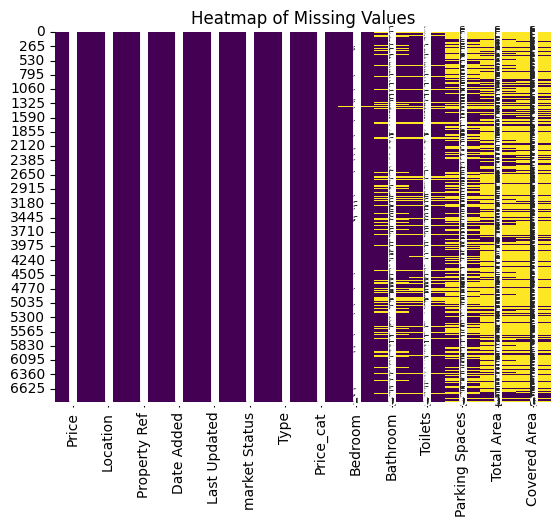

In [74]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis', annot=True)
plt.title('Heatmap of Missing Values')
plt.show()

In [75]:
df['Bathroom'].unique()

array([ nan,   2.,   4.,   6.,   5.,   8.,   3.,  10.,   1.,   7.,   9.,
        37.,  12.,  30.,  18.,  22.,  11.,  16.,  72.,  28.,  19.,  14.,
        64.,  13.,  20.,  17.,  24.,  46.,  48.,  40., 287.,  32.,  55.,
        70.,  39.,  23.,  60.,  25.,  26.,  44.,  50.,  93.])

In [76]:
missing_counts = df.isna().sum()

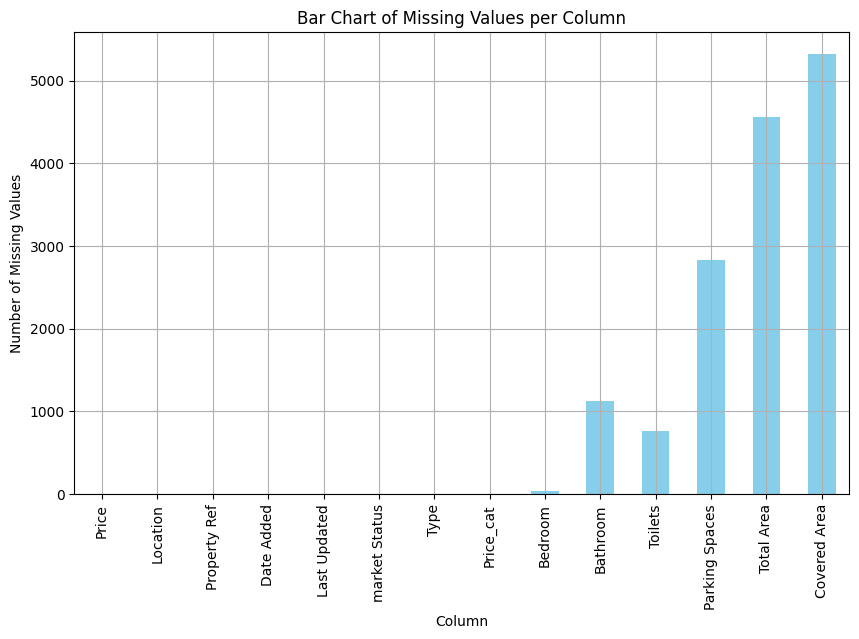

In [77]:
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.grid()
plt.show()

In [78]:
correlation_matrix = df[['Bedroom', 'Bathroom', 'Toilets','Parking Spaces']].corr()
print(correlation_matrix)

                Bedroom  Bathroom  Toilets  Parking Spaces
Bedroom            1.00      0.93     0.94            0.21
Bathroom           0.93      1.00     0.99            0.21
Toilets            0.94      0.99     1.00            0.23
Parking Spaces     0.21      0.21     0.23            1.00


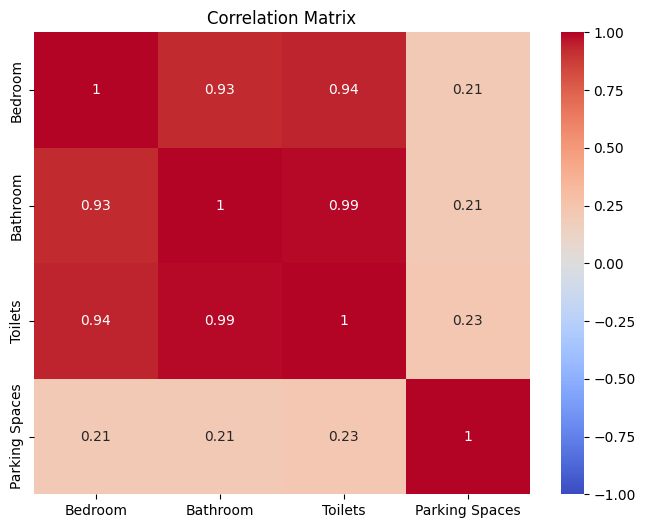

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [80]:
correlation_matrix = df[['Bedroom', 'Bathroom', 'Toilets','Parking Spaces','Price']].corr()
print(correlation_matrix)

                Bedroom  Bathroom  Toilets  Parking Spaces  Price
Bedroom            1.00      0.93     0.94            0.21   0.00
Bathroom           0.93      1.00     0.99            0.21   0.16
Toilets            0.94      0.99     1.00            0.23   0.15
Parking Spaces     0.21      0.21     0.23            1.00   0.02
Price              0.00      0.16     0.15            0.02   1.00


In [81]:
df_noe=df[df.Bedroom<=10]

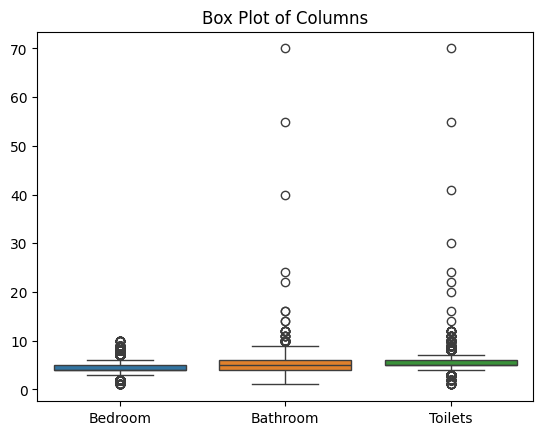

In [82]:
sns.boxplot(data=df_noe[['Bedroom', 'Bathroom', 'Toilets']])
plt.title('Box Plot of Columns')
plt.show()

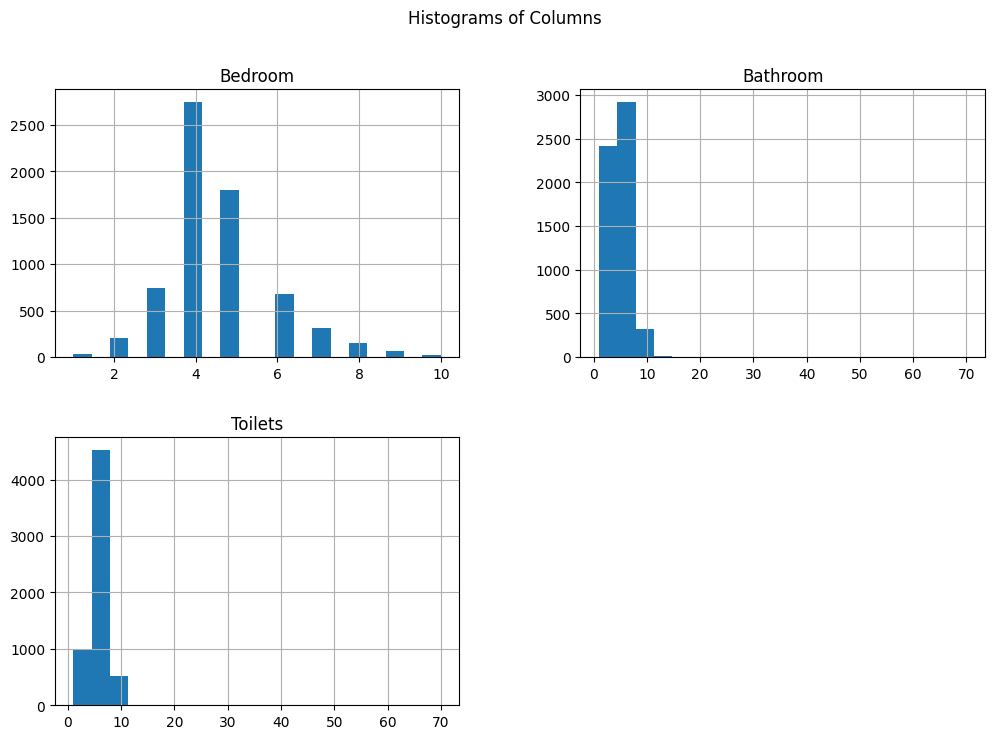

In [83]:
df_noe[['Bedroom', 'Bathroom', 'Toilets']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Columns')
plt.show()

In [84]:
df_noe['Bedroom'].value_counts().sort_values(ascending=False)

Bedroom
4.00     2746
5.00     1799
3.00      743
6.00      677
7.00      314
2.00      204
8.00      147
9.00       70
1.00       34
10.00      19
Name: count, dtype: int64

<BarContainer object of 10 artists>

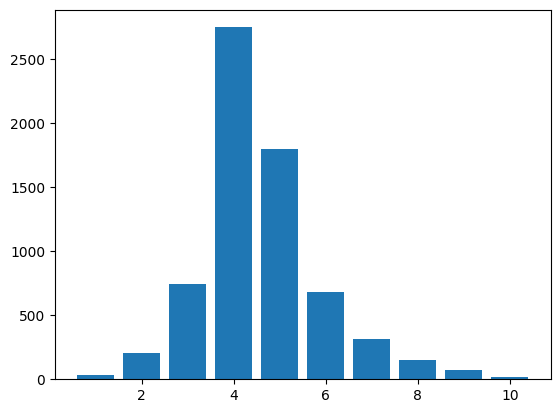

In [85]:
df_rooms=df_noe['Bedroom'].value_counts().reset_index(name='freq')
plt.bar('Bedroom','freq',data=df_rooms)

In [86]:
df.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type', 'Price_cat', 'Bedroom', 'Bathroom', 'Toilets',
       'Parking Spaces', 'Total Area', 'Covered Area'],
      dtype='object')

I noticed i had missing columns in the bathroom,toilets,parking spaces,total area and covered area. the cases in total area and covered area are really severe so i cant draw any conclusion and seeing as it's really plenty i dont have any means to impute the values, and i also noticed i had really high correlation for the bedroom,bathroom and toilets column so i will be keeping the bedroom column while i will be dropping the remaining to proceed then use an imputer to impute the missing value in the bedroom column

In [87]:
df.drop(['Parking Spaces', 'Total Area', 'Covered Area'],axis=1,inplace=True)


In [88]:
df.head()

,Price,Location,Property Ref,Date Added,Last Updated,market Status,Type,Price_cat,Bedroom,Bathroom,Toilets
0,63246500,"After Mountain Of Fire Estate, Before Shalom E...",2260849,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5.00,NaN,NaN
1,65000000,"By American International School, Durumi, Abuja",2260848,2024-05-17,2024-05-17,Available,Block of Flats,Millions,2.00,2.00,3.00
2,480000000,"Wuye, Abuja",2260802,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,5.00,NaN,6.00
3,140000000,"Karsana Gwarimpa Extension In An Estate, Gwari...",2260786,2024-05-17,2024-05-17,Available,Detached Duplex,Millions,4.00,4.00,5.00
4,63500000,"Lugbe District, Abuja",2260743,2024-05-17,2024-05-17,Available,House,Millions,5.00,6.00,6.00


Dealing with outliers  & skewness

In [89]:
filt=(df.Bedroom<=10) & (df.Bathroom<=10) & (df.Toilets<=10)
df_abn=df[~filt]
df_reg=df[filt]

In [90]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5619 entries, 1 to 6865
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Price          5619 non-null   int64         
 1   Location       5619 non-null   object        
 2   Property Ref   5619 non-null   object        
 3   Date Added     5619 non-null   datetime64[ns]
 4   Last Updated   5619 non-null   datetime64[ns]
 5   market Status  5619 non-null   object        
 6   Type           5619 non-null   object        
 7   Price_cat      5619 non-null   category      
 8   Bedroom        5619 non-null   float64       
 9   Bathroom       5619 non-null   float64       
 10  Toilets        5619 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 488.6+ KB


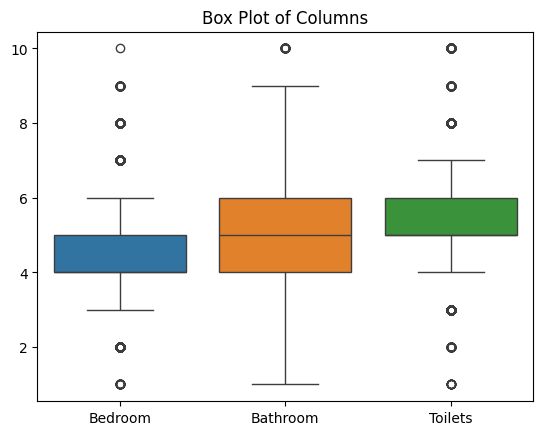

In [91]:
sns.boxplot(data=df_reg[['Bedroom', 'Bathroom', 'Toilets']])
plt.title('Box Plot of Columns')
plt.show()

In [92]:
df_reg.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type', 'Price_cat', 'Bedroom', 'Bathroom', 'Toilets'],
      dtype='object')

In [93]:
df_reg.describe()[['Price','Bedroom','Bathroom', 'Toilets']]

,Price,Bedroom,Bathroom,Toilets
count,5619.00,5619.00,5619.00,5619.00
mean,921011490.48,4.56,4.91,5.54
min,250000.00,1.00,1.00,1.00
25%,120000000.00,4.00,4.00,5.00
50%,220000000.00,4.00,5.00,5.00
75%,400000000.00,5.00,6.00,6.00
max,1400000000000.00,10.00,10.00,10.00
std,20636710987.30,1.28,1.41,1.36


In [94]:
df_reg.columns

Index(['Price', 'Location', 'Property Ref', 'Date Added', 'Last Updated',
       'market Status', 'Type', 'Price_cat', 'Bedroom', 'Bathroom', 'Toilets'],
      dtype='object')

So i've been able to get out rows and columns with no missing values to work with and store them in a data frame df_reg.

In [95]:
df_reg.to_csv('CLean house.csv',index=False)

In [ ]:
l=['Bedroom', 'Bathroom', 'Toil]

In [ ]:
"""for i in l:
    df[i] = np.log1p(df[i])"""

In [ ]:
df.head()

In [ ]:
sns.pairplot(df[['Bathroom', 'Bedroom', 'Toilets']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [ ]:
df.describe()[['Price','Bedroom','Bathroom','Toilets','Parking Spaces']]

In [ ]:
df.loc[df.Price.idxmax()]

In [ ]:
df.loc[df.Bedroom.idxmax()]

In [ ]:
df.loc[df.Bathroom.idxmax()]

In [ ]:
df.loc[df.Toilets.idxmax()]

In [ ]:
df_check=df.copy()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
#creating a dataframe with rows i can work with
df_=df[~df_later].copy()

In [ ]:
df_.info()

In [ ]:
df_[df_.Bedroom.isnull()]

In [ ]:
df_temp=df[['Bedroom', 'Bathroom', 'Toilets']].copy()

In [ ]:
df_temp.fillna(df_temp.mean(),inplace=True)

In [ ]:
df_temp

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

#Bedroom x Bathroom
ax[0].scatter(df_temp['Bedroom'],df_temp['Bathroom'],alpha=0.7,color='green')
ax[0].set_title('Bathrooms vs Bedrooms')
ax[0].set_xlabel('Number of Bedrooms')
ax[0].set_ylabel('Number of Bathrooms')

#Bedroom x Toilets
ax[1].scatter(df_temp['Bedroom'],df_temp['Toilets'],alpha=0.7,color='grey')
ax[1].set_title('Bathrooms vs Toilets')
ax[1].set_xlabel('Number of Bedrooms')
ax[1].set_ylabel('Number of Toilets')

In [ ]:
df.columns

In [ ]:
def get_location(x):
    location = x.split(',')
    if len(location)<3:
        location=location[0].strip(" ")
    else:
        location = location[1].strip(" ")

    return location 

df['Town']=df['Location'].apply(lambda x:f'{get_location(x)}')

In [ ]:
df['Location'].nunique()

In [ ]:
df['Town'].nunique()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
corrections1=['Guzape','Gwarimpa','Life Camp','Lugbe','Apo','Wuye','Wuse','Maitama','Lokogoma','kyami',]

In [ ]:
df['Town'].unique()

In [ ]:
df['Town'].value_counts()